## 3.4 모집단에서 표본 추출 시뮬레이션
3.4~3.6절에서는 추측통계의 기초이론을 배운다.

In [4]:
# 수치계산 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats 

# 시각화 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 표시 자릿수 지정
%precision 3
# 그래프를 쥬피터 노트북에 그리기 위한 설정
%matplotlib inline

### 3.4.3 5마리 물고기의 예

In [19]:
fish_5 = np.array([2,3,4,5,6])
fish_5

array([2, 3, 4, 5, 6])

In [194]:
# 랜덤으로 몇 마리를 고르고 싶을 때는 np.random.choice 함수를 사용하면 된다.
# size = 3 이라고 지정하면 샘플사이즈가 3이 되고 
# replace = False라고 지정하면 비복원추출으로 설정이 되어 중복이 되지 않게 선택할 수 있다. 
np.random.choice(fish_5, size=3, replace = False)

array([4, 3, 2])

In [26]:
# np.random.seed 함수를 이용해 난수 시드를 지정하기
# random을 고정해두는 것이라고 생각하면 됨
np.random.seed(1)
np.random.choice(fish_5, size=3, replace = False)

array([4, 3, 6])

In [27]:
# 한번 더 확인
# 이전과 똑같은 표본을 얻음
np.random.seed(1) # np.random.seed(1)를 계속 같이 써줘야 함
np.random.choice(fish_5, size=3, replace = False)

array([4, 3, 6])

In [30]:
# 골라낸 표본의 평균값 계산 (= 표본평균)
np.random.seed(1)
sp.mean(np.random.choice(fish_5, size=3, replace = False))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  This is separate from the ipykernel package so we can avoid doing imports until


4.333333333333333

__난수는 랜덤으로 골라낸 값__이다.

### 3.4.5 복원추출과 비복원추출

복원추출: replace = True\
비복원추출: replace = False

### 3.4.6 더 많은 물고기가 있는 호수에서 표본추출

In [56]:
# 데이터프레임으로 가져오면 안되고 시리즈로 가져와야 밑에서 쓸 수 있음
fish_100000 = pd.read_csv('https://raw.githubusercontent.com/runble1/atarashii_toukei/master/3-4-1-fish_length_100000.csv')['length']
fish_100000

0        5.297442
1        3.505566
2        3.572546
3        3.135979
4        4.689275
           ...   
99995    4.158780
99996    4.818718
99997    4.060880
99998    4.271488
99999    3.396745
Name: length, Length: 100000, dtype: float64

In [60]:
len(fish_100000)

100000

In [63]:
sampling_result = np.random.choice(fish_100000, size = 10, replace = False)
sampling_result

array([5.119, 3.3  , 4.68 , 3.034, 3.789, 3.668, 3.149, 2.316, 4.326,
       4.112])

In [64]:
# 표본평균계산
sp.mean(sampling_result)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  


3.7492045778521415

In [65]:
# 모평균 (모집단의 평균 = 전체평균)
sp.mean(fish_100000)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  


4.000

In [66]:
# 모표준편차
sp.std(fish_100000)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  


0.800

In [67]:
# 모분산
sp.var(fish_100000)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  


0.640

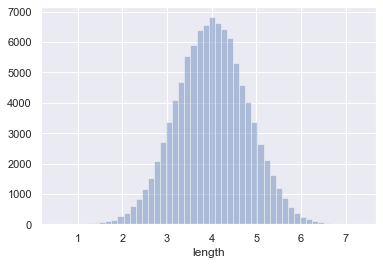

In [68]:
# 모집단의 히스토그램
sns.distplot(fish_100000, kde=False)

### 3.4.5 모집단분포와 정규분포 간 확률밀도함수 비교

In [74]:
# np.arange(start =1 , stop = 7.1, step =0.1)
x = np.arange(1 , 7.1, 0.1)
x

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ])

In [75]:
# stats.norm.pdf 함수로 확률밀도를 계산할 수 있다
# loc 은 평균값이고 scale이 표준편차이다
# 확률밀도
stats.norm.pdf(x=x, loc=4, scale =0.8)

array([4.407e-04, 6.988e-04, 1.091e-03, 1.676e-03, 2.536e-03, 3.778e-03,
       5.540e-03, 7.998e-03, 1.137e-02, 1.591e-02, 2.191e-02, 2.971e-02,
       3.967e-02, 5.215e-02, 6.749e-02, 8.598e-02, 1.078e-01, 1.332e-01,
       1.619e-01, 1.938e-01, 2.283e-01, 2.648e-01, 3.025e-01, 3.401e-01,
       3.764e-01, 4.102e-01, 4.401e-01, 4.648e-01, 4.833e-01, 4.948e-01,
       4.987e-01, 4.948e-01, 4.833e-01, 4.648e-01, 4.401e-01, 4.102e-01,
       3.764e-01, 3.401e-01, 3.025e-01, 2.648e-01, 2.283e-01, 1.938e-01,
       1.619e-01, 1.332e-01, 1.078e-01, 8.598e-02, 6.749e-02, 5.215e-02,
       3.967e-02, 2.971e-02, 2.191e-02, 1.591e-02, 1.137e-02, 7.998e-03,
       5.540e-03, 3.778e-03, 2.536e-03, 1.676e-03, 1.091e-03, 6.988e-04,
       4.407e-04])

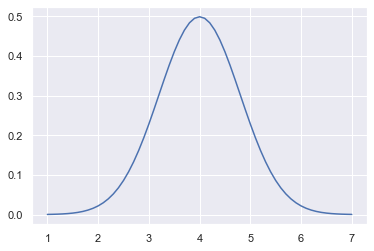

In [87]:
# 확률밀도를 그래프로 그리기
plt.plot(x, stats.norm.pdf(x=x, loc=4, scale =0.8))

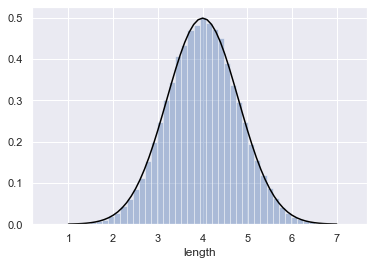

In [200]:
# 정규분포의 확률밀도와 모집단의 히스토그램 그래프를 겹쳐서 그려보기
# 여기서는 norm_hist = True 를 해줘야 겹쳐서 그려짐 (그래야 y축 범위가 같아져서)
# norm_hist = True 를 지정하면 면적이 1이 되는 히스토그램이 된다. 
sns.distplot(fish_100000, kde=False, norm_hist = True)
plt.plot(x, stats.norm.pdf(x=x, loc=4, scale =0.8), color = 'black')

### 3.4.9 표본을 얻는 절차의 추상화

pmf	확률질량함수(probability mass function)\
pdf	확률밀도함수(probability density function)\
__ex) stats.norm.pdf(x=x, loc=4, scale =0.8)__\
cdf	누적분포함수(cumulative distribution function)\
ppf	누적분포함수의 역함수(inverse cumulative distribution function)\
sf	생존함수(survival function) = 1 - 누적분포함수\
isf	생존함수의 역함수(inverse survival function)\
rvs	랜덤 표본 생성(random variable sampling)\
https://datascienceschool.net/view-notebook/e6c0d4ff9f4c403c8587c7d394bc930a/

In [97]:
# 시작부터 정규분포를 따르는 난수 생성 함수인 stats.norm.rvs를 사용하기
# stats.norm.rvs 함수에 평균(loc), 표준편차(scale), 생성되는 샘플사이즈(size)를 지정한다.
sampling_norm = stats.norm.rvs(loc = 4, scale = 0.8, size = 10)
sampling_norm

array([4.555, 3.908, 3.534, 3.489, 3.938, 3.927, 2.577, 4.832, 4.343,
       4.985])

In [98]:
# 표본평균구하기
sp.mean(sampling_norm)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  


4.0088016048436135

## 3.5 표본 통계량 성질

### 3.5.2 표본분포
표본분포는 표본의 통계량이 따르는 확률분포이다. 예를 들으 모집단에서 표본추출 시뮬레이션을 10000회 시행하면 10000개의 표본을 얻을 수 있다. 표본에서 각각 표본평균을 계산할 수 있으므로 이 경우에는 표본평균이 10000개 생기게된다. 이 10000개의 표본평균이 따르는 확률분포가 표본분포이다.

In [116]:
# 평균 4, 표준편차 0.8인 정규분포 모집단 생성
population = stats.norm(loc = 4, scale = 0.8)
population

### 3.5.4 표본평균을 여러번 계산하기 - 중요!

In [117]:
# 평균값들을 저장할 배열 생성
sample_mean_array = (np.zeros(10000))

In [124]:
# 시뮬레이션 실행
# random을 고정해두는 것이라고 생각하면 됨
np.random.seed(1)
for i in range(0,10000):
    # rvs = 랜덤 표본 생성(random variable sampling)
    sample = population.rvs(size=10)
    # population = stats.norm(loc = 4, scale = 0.8)이므로 
    # stats.norm.rvs(loc = 4, scale = 0.8, size=10) 해도 같은 결과
    sample_mean_array[i] = sp.mean(sample)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  


In [125]:
sample_mean_array[:100]

array([3.922, 3.864, 4.07 , 3.857, 4.185, 4.142, 4.365, 3.912, 4.116,
       4.052, 4.032, 3.827, 4.276, 3.914, 4.289, 3.957, 4.02 , 4.3  ,
       4.09 , 4.516, 3.761, 4.018, 4.27 , 3.908, 3.863, 4.028, 4.034,
       4.257, 3.938, 4.002, 3.965, 4.402, 4.12 , 3.415, 3.967, 4.012,
       3.834, 4.216, 3.806, 4.099, 3.889, 3.827, 4.146, 4.661, 4.019,
       3.953, 4.217, 3.826, 4.351, 3.626, 3.733, 4.149, 4.578, 3.934,
       3.638, 3.959, 4.353, 4.337, 3.896, 4.43 , 3.71 , 3.918, 4.056,
       3.863, 3.824, 4.334, 3.693, 3.984, 4.257, 3.899, 3.958, 3.968,
       3.876, 3.908, 3.854, 4.031, 3.836, 3.956, 3.88 , 3.954, 4.2  ,
       4.092, 3.974, 4.194, 4.253, 4.462, 3.836, 4.315, 4.071, 3.459,
       4.233, 4.123, 4.017, 4.172, 4.219, 4.239, 3.706, 3.664, 3.962,
       4.011])

### 3.5.5 표본평균의 평균값은 모평균에 가깝다

In [156]:
# 모평균이 4였는데 그 값과 상당히 근접한 값이 되었음을 알 수 있다. 
sp.mean(sample_mean_array)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  


4.004202422791747

In [157]:
# 표본평균의 표준편차
sp.std(sample_mean_array)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  


0.25134551686757256

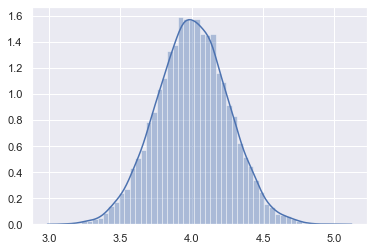

In [131]:
# 표본평균의 히스토그램
sns.distplot(sample_mean_array)

### 3.5.6 샘플사이즈가 크면 표본평균은 모평균에 가까워진다

In [132]:
size_array = np.arange(10, 100100, 100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [138]:
# 표본평균을 저장할 변수 준비
sample_mean_array_size = np.zeros(len(size_array))

In [158]:
# 시뮬레이션 실행
np.random.seed(1)
for i in range(0, len(size_array)):
    # population = stats.norm(loc = 4, scale = 0.8)
    sample = population.rvs(size_array[i])
    sample_mean_array_size[i] = sp.mean(sample)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  


Text(0, 0.5, 'sample_mean_array_size')

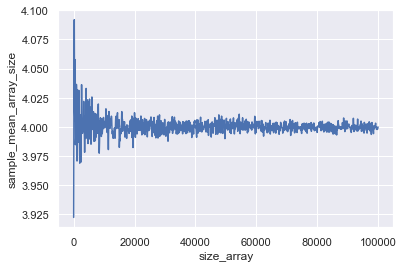

In [159]:
# 가로축이 샘플사이즈(size_array), 세로축이 표본평균(sample_mean_array_size)인 그래프
plt.plot(size_array, sample_mean_array_size)
plt.xlabel("size_array")
plt.ylabel("sample_mean_array_size")

__그래프를 보면 샘플 사이즈가 커질수록 표본평균이 모평균(4)에 가까워진다는 것을 알 수 있다.__

### 3.5.7 표본평균을 몇 번이고 계산하는 함수 만들기

In [160]:
# 시뮬레이션을 좀 더 쉽게 하기 위해 표본평균을 몇 번이고 계산하는 함수만들기
# 이름은 calc_sample_mean이라고 하기
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0,n_trial):
        # population = stats.norm(loc = 4, scale = 0.8)
        # size_array = np.arange(10, 100100, 100)
        sample = population.rvs(size)
        sample_mean_array[i] = sp.mean(sample)
    return(sample_mean_array)

In [161]:
np.random.seed(1)
sp.mean(calc_sample_mean(10, 10000))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  


4.004202422791747

### 3.5.8 샘플사이즈를 바꿨을 때 표본평균의 분산

In [167]:
# tile은 동일한 값 또는 행렬을 반복하여 하나의 행렬을 만다는 함수로, 
# 총 두 개의 매개변수를 갖는다. ex) tile(A, reps)
A = 1
B = np.array([0, 1])
print("np.tile(A, 3):",np.tile(A, 3))
print("np.tile(B, 3):",np.tile(B, 3))

np.tile(A, 3): [1 1 1]
np.tile(B, 3): [0 1 0 1 0 1]


In [177]:
np.random.seed(1)
# Sample Size = 10
size_10 = calc_sample_mean(10, 10000)
size_10_df = pd.DataFrame(
{"sample_mean" : size_10,
"size": np.tile("size 10", 10000)})

# Sample Size = 20
size_20 = calc_sample_mean(20, 10000)
size_20_df = pd.DataFrame(
{"sample_mean" : size_20,
"size": np.tile("size 20", 10000)})

# Sample Size = 30
size_30 = calc_sample_mean(30, 10000)
size_30_df = pd.DataFrame(
{"sample_mean" : size_30,
"size": np.tile("size 30", 10000)})

# 종합
result = pd.concat([size_10_df,size_20_df,size_30_df]).reset_index(drop=True)

result

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  if __name__ == '__main__':


,sample_mean,size
0,3.922287,size 10
1,3.864329,size 10
2,4.069530,size 10
3,3.857140,size 10
4,4.184654,size 10
...,...,...
29995,3.980022,size 30
29996,3.770016,size 30
29997,3.930151,size 30
29998,4.075567,size 30


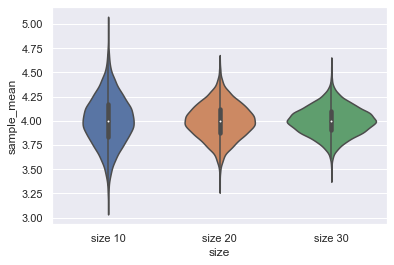

In [182]:
sns.violinplot(x = 'size',
               y = 'sample_mean',
               data = result)

__샘플사이즈가 커질수록 표본평균이 흩어지는 정도가 작아져서 모평균(4)에 가깝게 모이는 것을 알 수 있다.__

### 3.5.9 표본평균의 표준편차는 모집단보다 작다

샘플사이즈가 커질수록 표본평균의 표준편차는 작아딘다 -> 샘플사이즈가 커지면 표본평균은 보다 신뢰할 수 있는 값이 된다.

In [183]:
# 2~100까지 2씩 차이나게 하여 샘플사이즈 준비
size_array = np.arange(2,101,2)
size_array

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [186]:
# 표본평균의 표준편차를 저장할 변수를 준비
sample_mean_std_array = np.zeros(len(size_array))

In [188]:
# 시뮬레이션 실행
np.random.seed(1)
for i in range(0, len(size_array)):
    sample_mean = calc_sample_mean(size_array[i], 100)
    sample_mean_std_array[i] = sp.std(sample_mean, ddof= 1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  """


Text(0.5, 1.0, 'relationship between sample size and mean_std value')

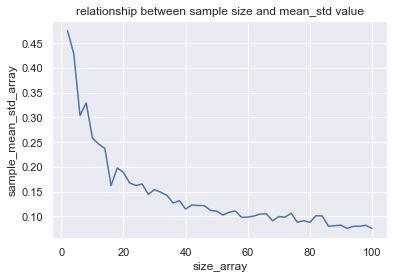

In [192]:
plt.plot(size_array, sample_mean_std_array)
plt.xlabel('size_array')
plt.ylabel('sample_mean_std_array')
plt.title('relationship between sample size and mean_std value')

__샘플사이즈가 커질수록 표본평균의 표준편차가 작아짐을 알 수 있다.__